In [2]:
%matplotlib inline
import numpy as np
import mpl_toolkits.mplot3d
import matplotlib.pyplot as plt

import pygem
print(pygem.__version__)
from pygem import FFD

2.0.0


2000
(2000, 3)


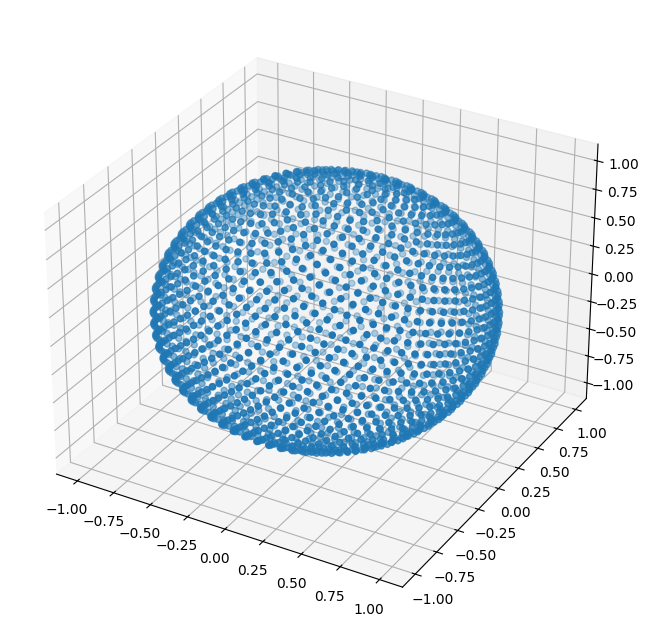

In [8]:
def mesh_points(num_pts = 2000):
    indices = np.arange(0, num_pts, dtype=float) + 0.5

    phi = np.arccos(1 - 2*indices/num_pts)
    theta = np.pi * (1 + 5**0.5) * indices
    print(len(theta))
    return np.array([np.cos(theta) * np.sin(phi), np.sin(theta) * np.sin(phi), np.cos(phi)]).T

mesh = mesh_points()
print(mesh.shape)
plt.figure(figsize=(8,8)).add_subplot(111, projection='3d').scatter(*mesh.T);
plt.show()

In [ ]:
ffd = FFD([2, 2, 2])
print(ffd)
ffd.box_origin = [-2.0, -2.0, -2.0]
ffd.box_length = [4, 4, 4]
print(ffd)


conversion_unit = 1.0
n_control_points = [2 2 2]

box_length = [1. 1. 1.]
box_origin = [0. 0. 0.]
rot_angle  = [0. 0. 0.]

array_mu_x =
[[[0. 0.]
  [0. 0.]]

 [[0. 0.]
  [0. 0.]]]

array_mu_y =
[[[0. 0.]
  [0. 0.]]

 [[0. 0.]
  [0. 0.]]]

array_mu_z =
[[[0. 0.]
  [0. 0.]]

 [[0. 0.]
  [0. 0.]]]

rotation_matrix = 
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]

position_vertices = [[0. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]

conversion_unit = 1.0
n_control_points = [2 2 2]

box_length = [4, 4, 4]
box_origin = [-2.0, -2.0, -2.0]
rot_angle  = [0. 0. 0.]

array_mu_x =
[[[0. 0.]
  [0. 0.]]

 [[0. 0.]
  [0. 0.]]]

array_mu_y =
[[[0. 0.]
  [0. 0.]]

 [[0. 0.]
  [0. 0.]]]

array_mu_z =
[[[0. 0.]
  [0. 0.]]

 [[0. 0.]
  [0. 0.]]]

rotation_matrix = 
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]

position_vertices = [[-2. -2. -2.]
 [ 2. -2. -2.]
 [-2.  2. -2.]
 [-2. -2.  2.]]



In [ ]:
print('Movements of point[{}, {}, {}] along x: {}'.format(1, 1, 1, ffd.array_mu_x[1, 1, 1]))
print('Movements of point[{}, {}, {}] along z: {}'.format(1, 1, 1, ffd.array_mu_z[1, 1, 1]))

# ffd.array_mu_x[1, 1, 1] = 0
# ffd.array_mu_z[1, 1, 1] = 0
# ffd.array_mu_y[1, 1, 1] = 0
# ffd.array_mu_x[1, 0, 1] = 0
# ffd.array_mu_z[1, 0, 1] = 0
ffd.array_mu_x[1, 0, 0] = 2
ffd.array_mu_x[0, 1, 0] = 2
ffd.array_mu_x[0, 0, 1] = 2
print()
print('Movements of point[{}, {}, {}] along x: {}'.format(1, 1, 1, ffd.array_mu_x[1, 1, 1]))
print('Movements of point[{}, {}, {}] along z: {}'.format(1, 1, 1, ffd.array_mu_z[1, 1, 1]))

Movements of point[1, 1, 1] along x: 0.0
Movements of point[1, 1, 1] along z: 0.0

Movements of point[1, 1, 1] along x: 0.0
Movements of point[1, 1, 1] along z: 0.0


In [ ]:
new_mesh = ffd(mesh)
control_points = ffd.control_points().T
print(type(new_mesh), new_mesh.shape)
print(type(control_points), control_points.shape)

<class 'numpy.ndarray'> (2000, 3)
<class 'numpy.ndarray'> (3, 8)


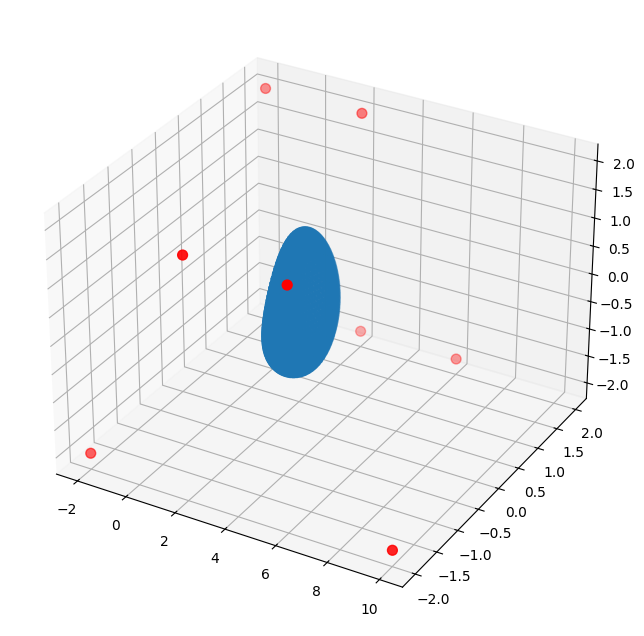

In [ ]:
ax = plt.figure(figsize=(8,8)).add_subplot(111, projection='3d')
ax.scatter(*new_mesh.T)
ax.scatter(*ffd.control_points().T, s=50, c='red')
plt.show()

In [ ]:
import numpy as np
import plotly.graph_objects as go

# # Example data
# new_mesh = np.random.rand(100, 3)   # 100 points in 3D
# control_points = np.random.rand(10, 3)  # 10 red control points

# Create interactive 3D scatter plot
fig = go.Figure()

# Add main mesh points
fig.add_trace(go.Scatter3d(
    x=new_mesh[:,0],
    y=new_mesh[:,1],
    z=new_mesh[:,2],
    mode='markers',
    marker=dict(size=3, color='blue'),
    name='mesh'
))

# Add control points
fig.add_trace(go.Scatter3d(
    x=control_points[0,:],
    y=control_points[1,:],
    z=control_points[2,:],
    mode='markers',
    marker=dict(size=8, color='red'),
    name='control points'
))

# Layout for axes
fig.update_layout(
    scene=dict(
        xaxis_title='X',
        yaxis_title='Y',
        zaxis_title='Z'
    ),
    width=700,
    height=700,
    title='Interactive 3D Scatter'
)

fig.show()
